In [69]:
!date

Wed Oct 16 15:40:51 EDT 2024


In [70]:
pwd

'/mmfs1/data/aglinska/BC-ABCD-denoise/Code'

In [71]:
import ants
import numpy as np
import os
from matplotlib import pyplot as plt
from tqdm import tqdm

In [72]:
#indir = '../Data/020-fmriprepped/sub-NDARINV1H7JEJW1/ses-baselineYear1Arm1/func/sub-NDARINV1H7JEJW1_ses-baselineYear1Arm1_task-nback_run-02_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii'
indir = '../Data/020-fmriprepped/'
subs = [s for s in os.listdir(indir) if all((s.startswith('sub'),not s.endswith('.html')))]
epi_fn = os.path.join(indir,'{sub}/ses-baselineYear1Arm1/func/{sub}_ses-baselineYear1Arm1_task-nback_run-0{r}_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii')
subs = [sub for sub in subs if all(( os.path.exists(epi_fn.format(sub=sub,r=1)),os.path.exists(epi_fn.format(sub=sub,r=2)) ))]

subs.sort()
print(len(subs))

34


In [73]:
csf_fn = os.path.join(indir,'{sub}/ses-baselineYear1Arm1/anat/{sub}_ses-baselineYear1Arm1_run-01_space-MNI152NLin2009cAsym_res-2_label-CSF_probseg.nii.gz')
wm_fn = os.path.join(indir,'{sub}/ses-baselineYear1Arm1/anat/{sub}_ses-baselineYear1Arm1_run-01_space-MNI152NLin2009cAsym_res-2_label-WM_probseg.nii.gz')
gm_fn = os.path.join(indir,'{sub}/ses-baselineYear1Arm1/anat/{sub}_ses-baselineYear1Arm1_run-01_space-MNI152NLin2009cAsym_res-2_label-GM_probseg.nii.gz')
dseg_fn = os.path.join(indir,'{sub}/ses-baselineYear1Arm1/anat/{sub}_ses-baselineYear1Arm1_run-01_space-MNI152NLin2009cAsym_res-2_dseg.nii.gz')

  0%|                                                    | 0/34 [00:00<?, ?it/s]

N GM VOX 37_484
N CF VOX 2_382


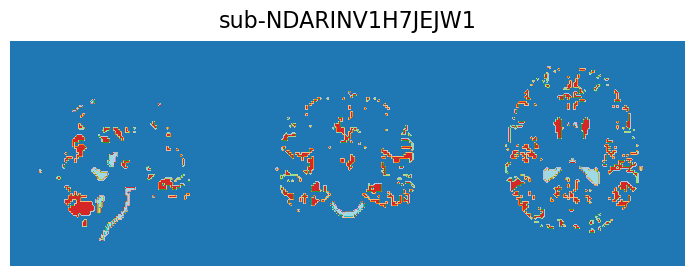

  3%|█▎                                          | 1/34 [00:00<00:08,  4.02it/s]

N GM VOX 33_652
N CF VOX 2_401


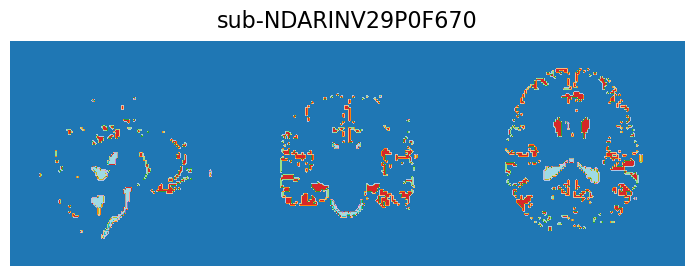

  6%|██▌                                         | 2/34 [00:00<00:07,  4.00it/s]

N GM VOX 43_102
N CF VOX 2_538


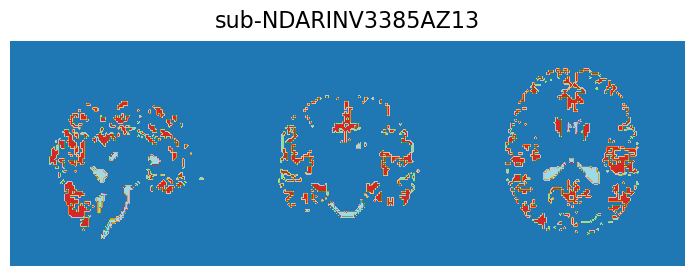

  9%|███▉                                        | 3/34 [00:00<00:07,  4.00it/s]

N GM VOX 36_406
N CF VOX 2_342


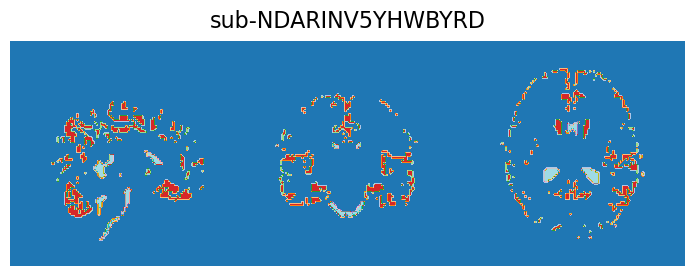

 12%|█████▏                                      | 4/34 [00:01<00:09,  3.22it/s]

N GM VOX 39_251
N CF VOX 2_414


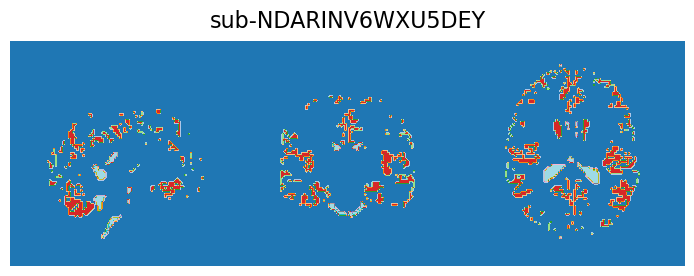

 15%|██████▍                                     | 5/34 [00:01<00:08,  3.44it/s]

N GM VOX 36_682
N CF VOX 4_028


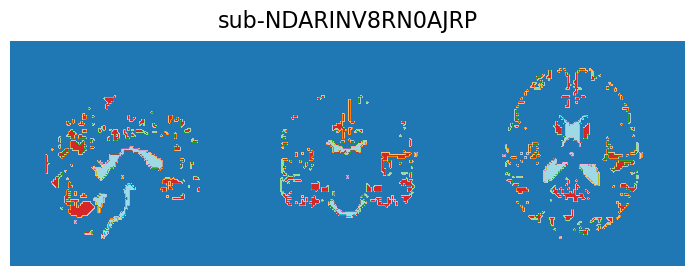

 18%|███████▊                                    | 6/34 [00:01<00:07,  3.60it/s]

N GM VOX 30_148
N CF VOX 1_835


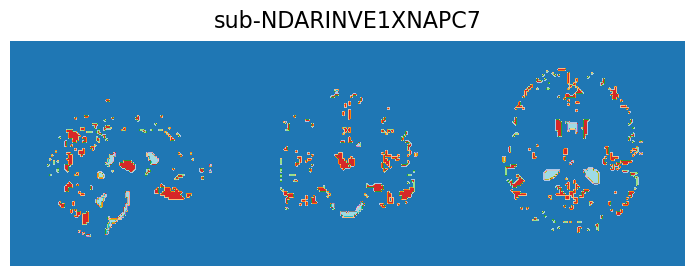

 21%|█████████                                   | 7/34 [00:01<00:07,  3.72it/s]

N GM VOX 40_205
N CF VOX 1_903


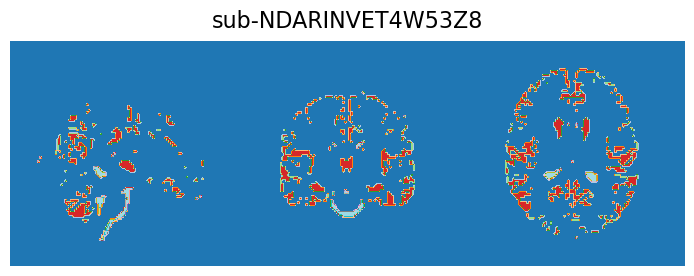

 24%|██████████▎                                 | 8/34 [00:02<00:06,  3.81it/s]

N GM VOX 35_095
N CF VOX 3_060


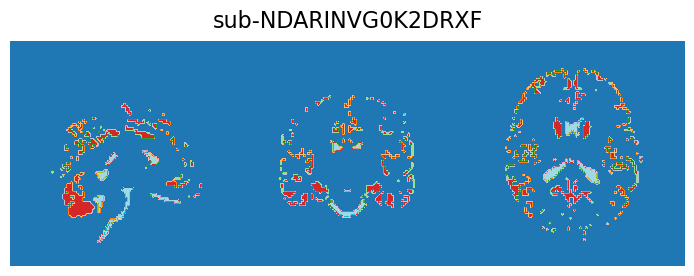

 26%|███████████▋                                | 9/34 [00:02<00:07,  3.53it/s]

N GM VOX 43_897
N CF VOX 1_945


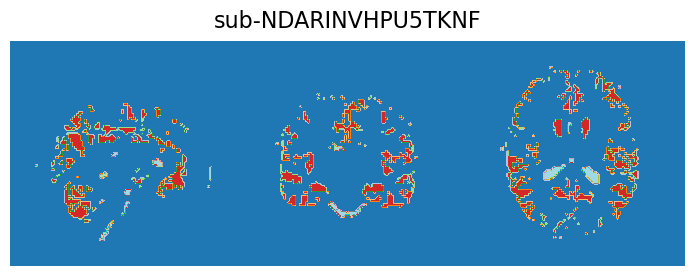

 29%|████████████▋                              | 10/34 [00:02<00:06,  3.65it/s]

N GM VOX 39_776
N CF VOX 2_065


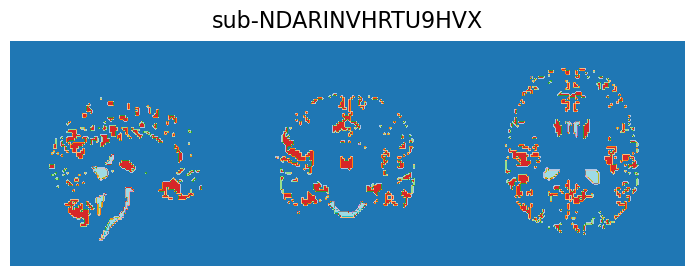

 32%|█████████████▉                             | 11/34 [00:03<00:06,  3.48it/s]

N GM VOX 27_689
N CF VOX 2_696


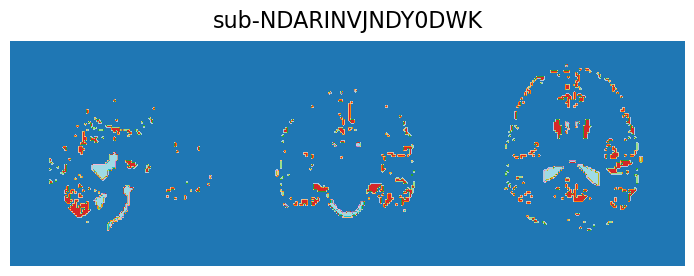

 35%|███████████████▏                           | 12/34 [00:03<00:06,  3.56it/s]

N GM VOX 40_805
N CF VOX 3_158


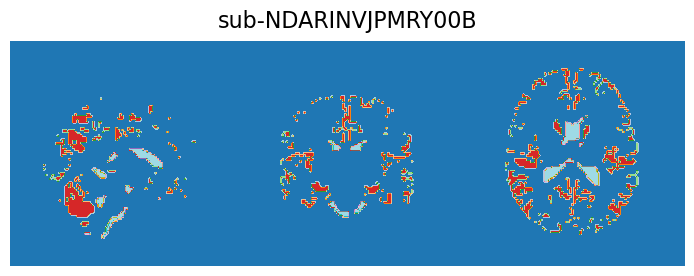

 38%|████████████████▍                          | 13/34 [00:03<00:05,  3.63it/s]

N GM VOX 42_907
N CF VOX 1_712


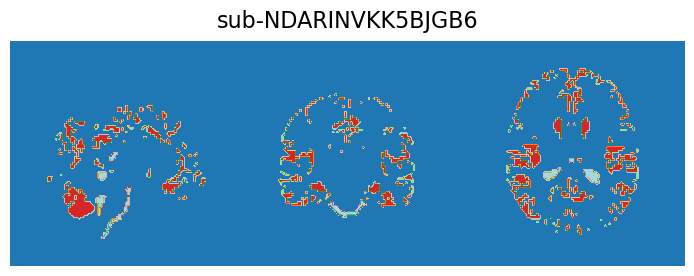

 41%|█████████████████▋                         | 14/34 [00:03<00:05,  3.69it/s]

N GM VOX 17_181
N CF VOX 2_610


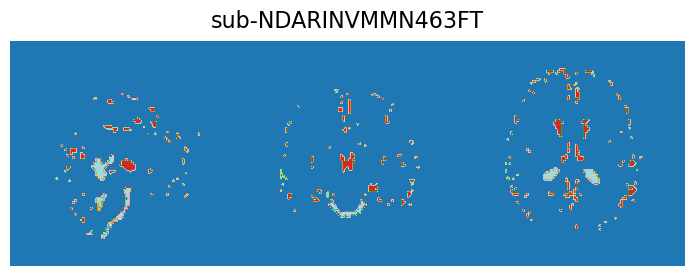

 44%|██████████████████▉                        | 15/34 [00:04<00:05,  3.75it/s]

N GM VOX 42_771
N CF VOX 2_632


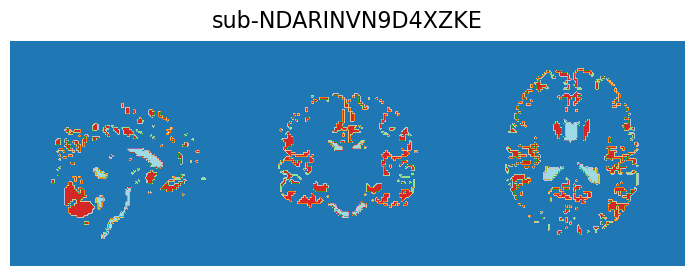

 47%|████████████████████▏                      | 16/34 [00:04<00:04,  3.72it/s]

N GM VOX 20_510
N CF VOX 3_647


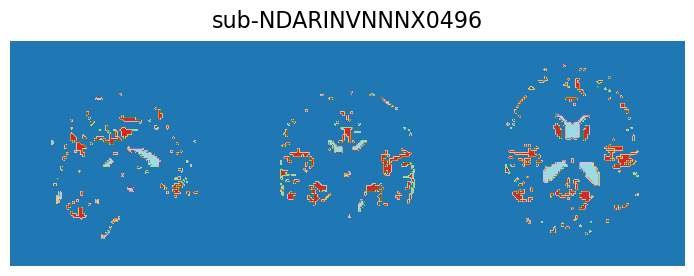

 50%|█████████████████████▌                     | 17/34 [00:04<00:04,  3.78it/s]

N GM VOX 32_403
N CF VOX 2_215


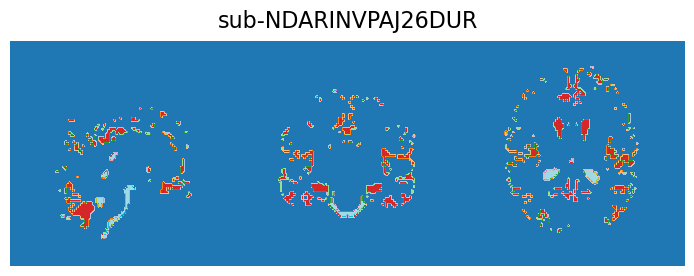

 53%|██████████████████████▊                    | 18/34 [00:04<00:04,  3.81it/s]

N GM VOX 40_433
N CF VOX 1_849


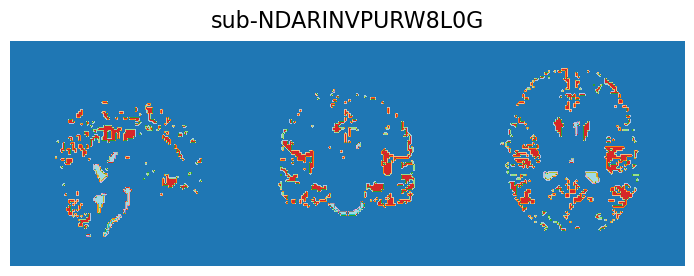

 56%|████████████████████████                   | 19/34 [00:05<00:03,  3.82it/s]

N GM VOX 30_366
N CF VOX 2_061


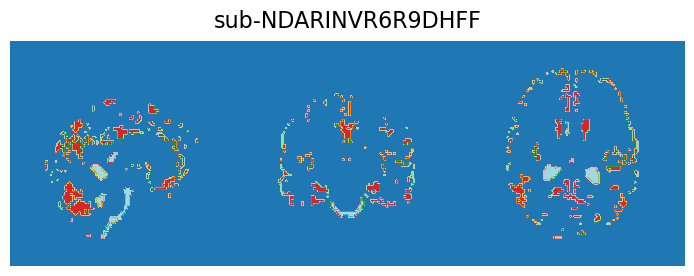

 59%|█████████████████████████▎                 | 20/34 [00:05<00:04,  3.35it/s]

N GM VOX 32_553
N CF VOX 2_241


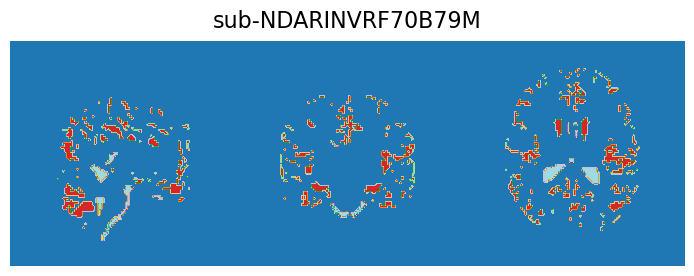

 62%|██████████████████████████▌                | 21/34 [00:05<00:03,  3.51it/s]

N GM VOX 40_317
N CF VOX 1_799


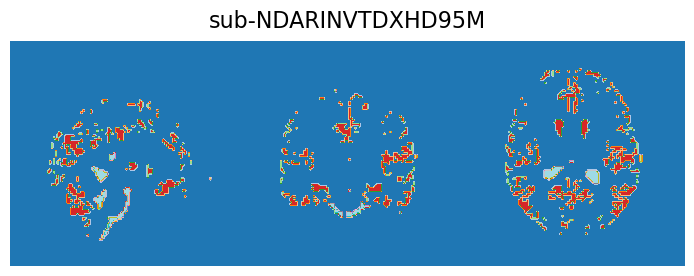

 65%|███████████████████████████▊               | 22/34 [00:06<00:03,  3.64it/s]

N GM VOX 25_849
N CF VOX 3_151


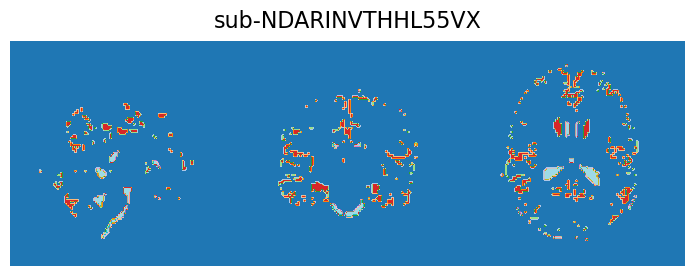

 68%|█████████████████████████████              | 23/34 [00:06<00:02,  3.75it/s]

N GM VOX 27_905
N CF VOX 2_784


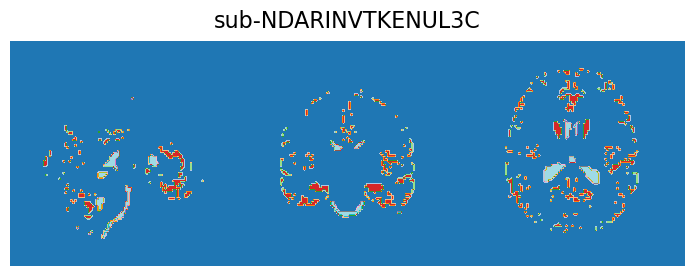

 71%|██████████████████████████████▎            | 24/34 [00:06<00:02,  3.82it/s]

N GM VOX 18_919
N CF VOX 2_787


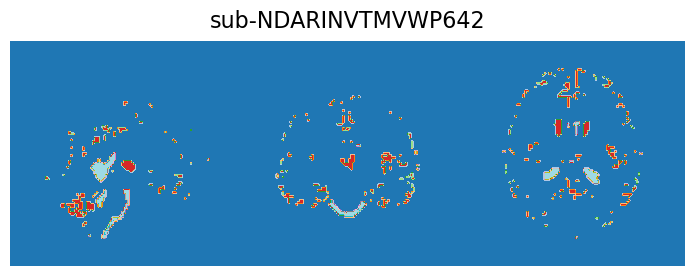

 74%|███████████████████████████████▌           | 25/34 [00:06<00:02,  3.88it/s]

N GM VOX 28_832
N CF VOX 3_194


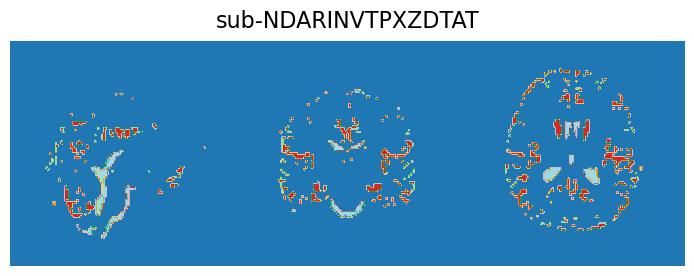

 76%|████████████████████████████████▉          | 26/34 [00:07<00:02,  3.90it/s]

N GM VOX 36_177
N CF VOX 2_256


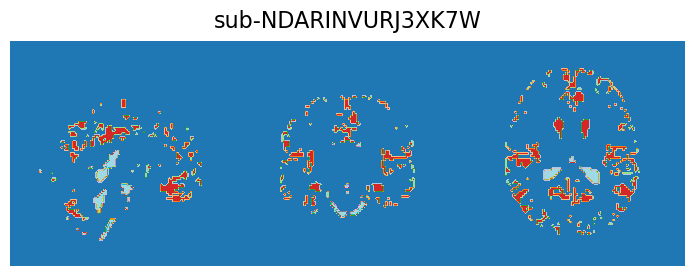

 79%|██████████████████████████████████▏        | 27/34 [00:07<00:01,  3.89it/s]

N GM VOX 39_389
N CF VOX 2_894


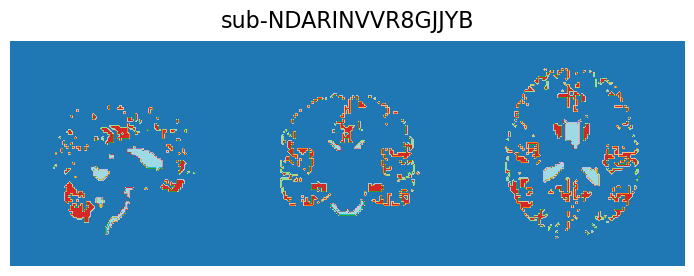

 82%|███████████████████████████████████▍       | 28/34 [00:07<00:01,  3.88it/s]

N GM VOX 22_110
N CF VOX 2_326


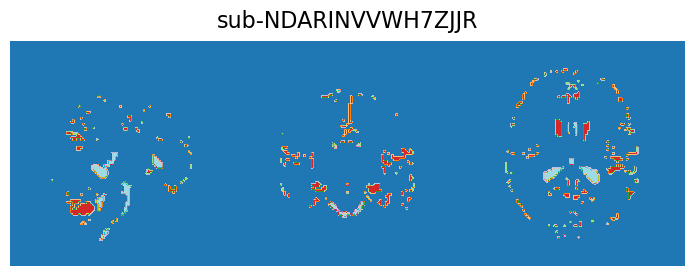

 85%|████████████████████████████████████▋      | 29/34 [00:07<00:01,  3.85it/s]

N GM VOX 41_352
N CF VOX 1_942


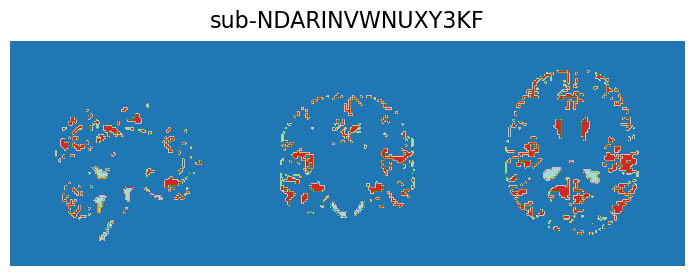

 88%|█████████████████████████████████████▉     | 30/34 [00:08<00:01,  3.84it/s]

N GM VOX 33_269
N CF VOX 2_042


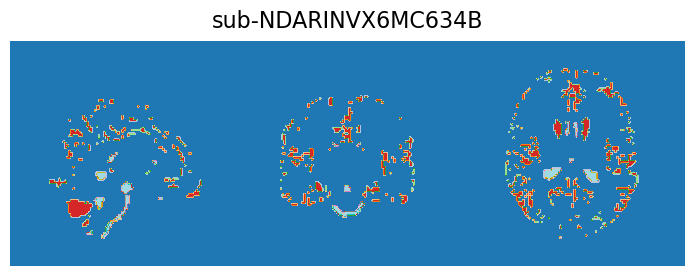

 91%|███████████████████████████████████████▏   | 31/34 [00:08<00:00,  3.78it/s]

N GM VOX 31_853
N CF VOX 3_408


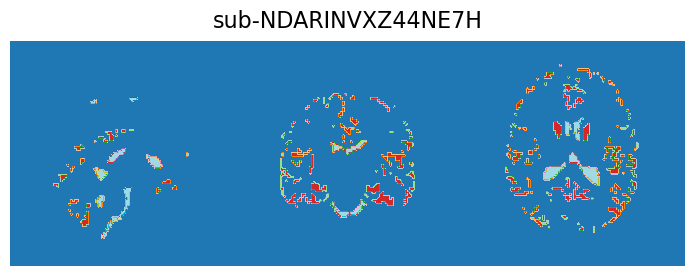

 94%|████████████████████████████████████████▍  | 32/34 [00:08<00:00,  3.78it/s]

N GM VOX 37_597
N CF VOX 2_817


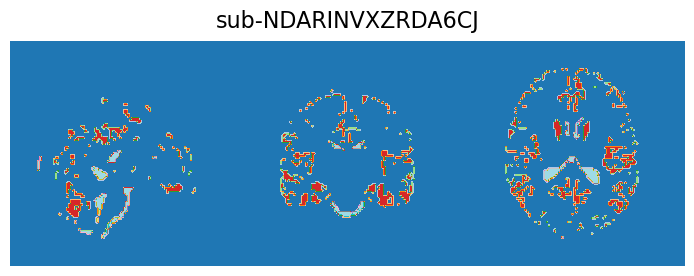

 97%|█████████████████████████████████████████▋ | 33/34 [00:08<00:00,  3.79it/s]

N GM VOX 17_405
N CF VOX 3_696


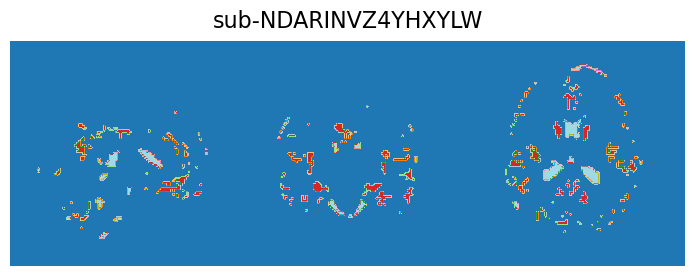

100%|███████████████████████████████████████████| 34/34 [00:09<00:00,  3.72it/s]


In [75]:
for sub in tqdm(subs):
    #sub = subs[4]
    csf = ants.image_read(csf_fn.format(sub=sub))
    wm = ants.image_read(wm_fn.format(sub=sub))
    gm = ants.image_read(gm_fn.format(sub=sub))
    gm_smooth = ants.smooth_image(image=gm,sigma=6,sigma_in_physical_coordinates=True,FWHM=True,max_kernel_width=32)
    dseg = ants.image_read(dseg_fn.format(sub=sub))
    #cf = csf+wm
    
    idx_gm = (gm.numpy()>.9) * (wm.numpy()<.1) * (csf.numpy()<.1)
    
    idx_wm = (wm.numpy()>.25) * (gm_smooth.numpy()<.1)
    idx_csf = (csf.numpy()>.25) * (gm_smooth.numpy()<.1)
    
    gm[idx_gm]=1
    gm[~idx_gm]=0
    
    wm[idx_wm]=1
    wm[~idx_wm]=0
    
    csf[idx_csf]=1
    csf[~idx_csf]=0
    
    #cf = csf+wm
    cf = csf
    cf[cf.numpy()>.01]=1
    
    
    t1 = gm>0
    t2 = cf>0
    overlap = t1+t2
    overlap = overlap==2
    
    gm[overlap==2]=0
    cf[overlap==2]=0
    
    value = gm.numpy().sum().astype(int);print(f'N GM VOX {value:_}' )
    value = cf.numpy().sum().astype(int);print(f'N CF VOX {value:_}' )
    
    assert (gm.numpy()+cf.numpy()).max()==1, 'overlapping voxels'
    
    (gm*5+cf*15).plot_ortho(flat=True,cmap='tab20',title=sub,textfontcolor='black',xyz_lines=False,orient_labels=False,titlefontsize=16)
    
    ofn_gm_fn = os.path.join(indir,'{sub}/ses-baselineYear1Arm1/anat/analysis_mask_GM-strict.nii'.format(sub=sub))
    gm.to_filename(ofn_gm_fn)
    
    ofn_cf_fn = os.path.join(indir,'{sub}/ses-baselineYear1Arm1/anat/analysis_mask_CF-strict.nii'.format(sub=sub))
    cf.to_filename(ofn_cf_fn)

In [86]:
all_cfs = [ants.image_read(os.path.join(indir,'{sub}/ses-baselineYear1Arm1/anat/analysis_mask_CF-strict.nii'.format(sub=sub))) for sub in subs]

In [87]:
all_gms = [ants.image_read(os.path.join(indir,'{sub}/ses-baselineYear1Arm1/anat/analysis_mask_GM-strict.nii'.format(sub=sub))) for sub in subs]

In [88]:
cons_GM = all_gms[0].new_image_like(np.array([im.numpy() for im in all_gms]).sum(axis=0))

In [89]:
cons_CF = all_cfs[0].new_image_like(np.array([im.numpy() for im in all_cfs]).sum(axis=0))

In [90]:
cons_GM.to_filename('../Misc/cons_GM-strict.nii')
cons_CF.to_filename('../Misc/cons_CF-strict.nii')

sys:1: ResourceWarning:

Unclosed socket <zmq.Socket(zmq.PUSH) at 0x1555517f18e0>



In [ ]:
# def sphere(shape, radius, position):
#     """Generate an n-dimensional spherical mask."""
#     # assume shape and position have the same length and contain ints
#     # the units are pixels / voxels (px for short)
#     # radius is a int or float in px
#     assert len(position) == len(shape)
#     n = len(shape)
#     semisizes = (radius,) * len(shape)

#     # genereate the grid for the support points
#     # centered at the position indicated by position
#     grid = [slice(-x0, dim - x0) for x0, dim in zip(position, shape)]
#     position = np.ogrid[grid]
#     # calculate the distance of all points from `position` center
#     # scaled by the radius
#     arr = np.zeros(shape, dtype=float)
#     for x_i, semisize in zip(position, semisizes):
#         # this can be generalized for exponent != 2
#         # in which case `(x_i / semisize)`
#         # would become `np.abs(x_i / semisize)`
#         arr += (x_i / semisize) ** 2

#     # the inner part of the sphere will have distance below or equal to 1
#     return arr <= 1.0
    
# im_sphere = csf.new_image_like(sphere(shape=csf.shape, radius=10, position=[48,74,45]).astype(float))
# im_sphere += csf.new_image_like(sphere(shape=csf.shape, radius=10, position=[41,52,51]).astype(float))
# im_sphere += csf.new_image_like(sphere(shape=csf.shape, radius=10, position=[59,52,51]).astype(float))
# im_sphere += csf.new_image_like(sphere(shape=csf.shape, radius=10, position=[50,64,50]).astype(float))
# im_sphere[im_sphere>0]=1
# im_sphere.to_filename('../sphere.nii')